# DATA 311 Final: Exploratory Analysis 

By: Grayson Hineline, Bhupinder Basi, and Cameron Kaminski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [3]:
#Dropping unnecessary columns so we can focus on features we want
object_cols = df.drop(columns=['timestamp', 'tag', 'dmaid', 'cityid', 'otherdetails', 'Some_College', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Highschool', 'rowNumber', 'bonus'])

In [4]:
#Using for loop to print out basic stats for the data
for column in object_cols:
    print(f"Total categories in the feature '{column}':\n", df[column].value_counts(), '\n-------------------------------------')

Total categories in the feature 'company':
 Amazon       8126
Microsoft    5216
Google       4330
Facebook     2990
Apple        2028
             ... 
 Google         1
siemens         1
chevron         1
Kla             1
mphasis         1
Name: company, Length: 1631, dtype: int64 
-------------------------------------
Total categories in the feature 'level':
 L4                          5014
L5                          4871
L3                          3337
L6                          2871
Senior Software Engineer    1443
                            ... 
Design Director                1
Program Manager 2              1
Senior Staff engineer          1
||                             1
Ic                             1
Name: level, Length: 2923, dtype: int64 
-------------------------------------
Total categories in the feature 'title':
 Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578

> Total count for all categories to get a sense of how the data is spread out. Some trends to notice are that within this STEM field it seems that majority of the employees are male. Within this dataset Amazon has the most employees. Most employees' title for their job is Software Engineer.

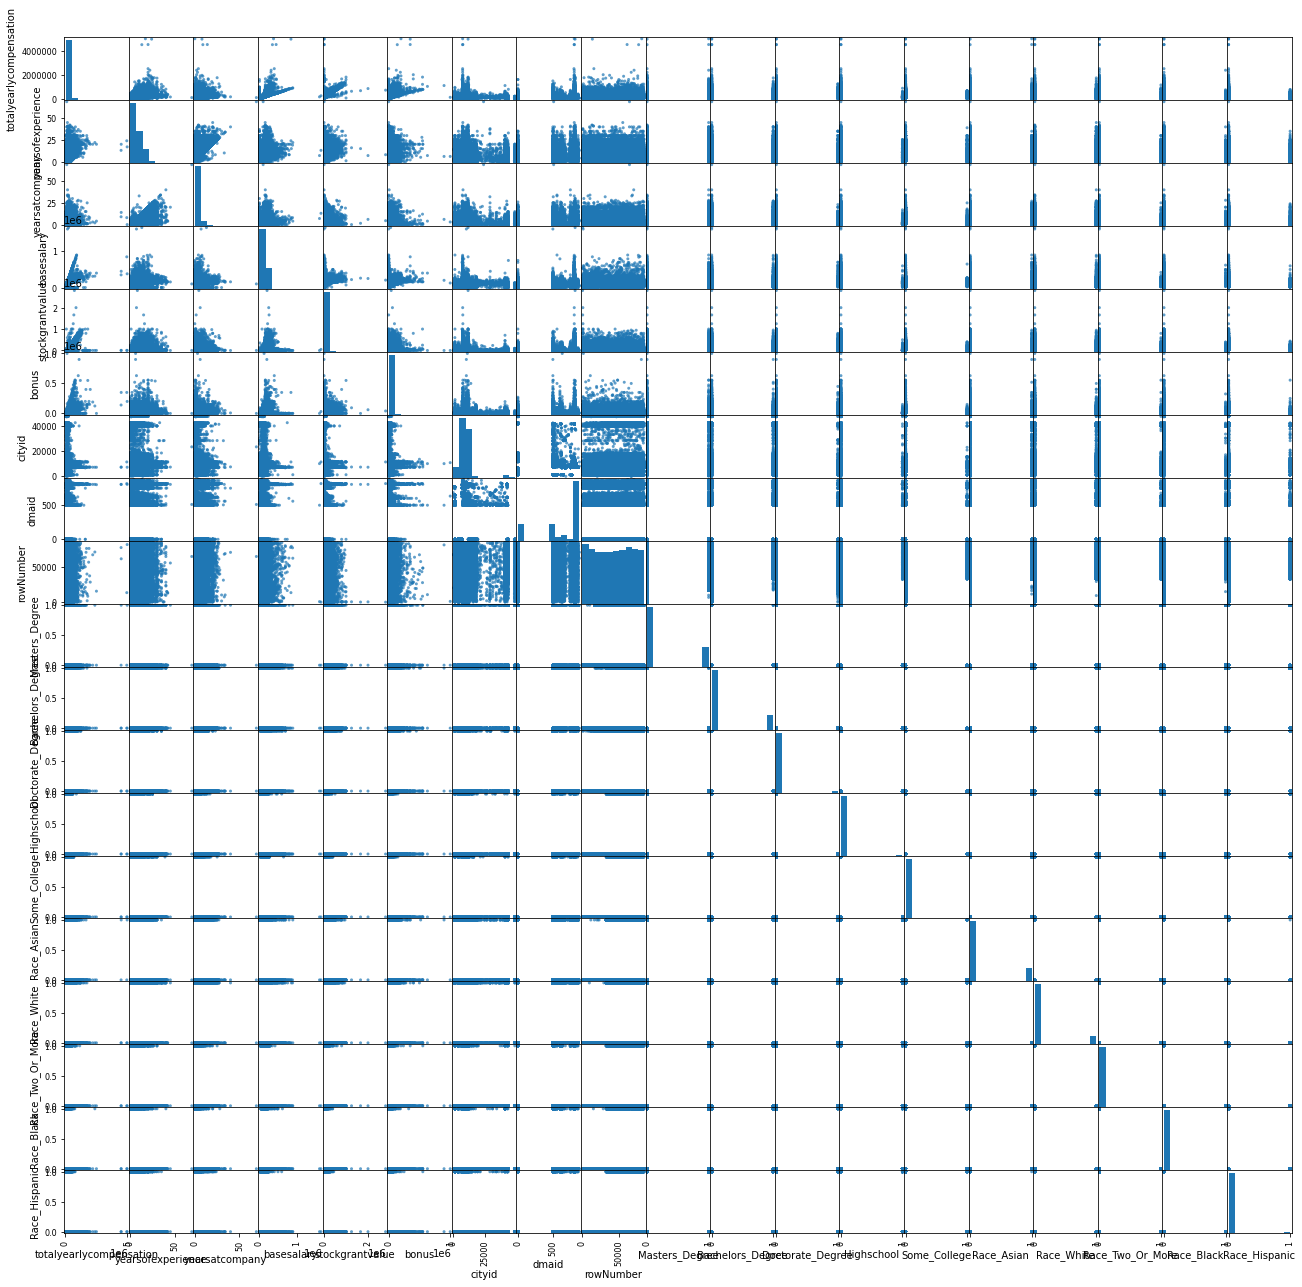

In [5]:
#Scatter Matrix
pd.plotting.scatter_matrix(df, alpha=0.7, figsize=(22,22));

Scatter matrix of all numerical values, as well as table to quickly see if there are any correlations.

In [6]:
#Finding correlations for different features within the dataset
df.corr()

totalyearlycompensation  yearsofexperience  \
totalyearlycompensation                 1.000000           0.422879   
yearsofexperience                       0.422879           1.000000   
yearsatcompany                          0.165802           0.522611   
basesalary                              0.672865           0.374437   
stockgrantvalue                         0.770756           0.289631   
bonus                                   0.489454           0.261051   
cityid                                 -0.110204          -0.014100   
dmaid                                   0.376346           0.030903   
rowNumber                              -0.092622          -0.002836   
Masters_Degree                          0.018320           0.060310   
Bachelors_Degree                       -0.139866          -0.069468   
Doctorate_Degree                        0.097179          -0.005380   
Highschool                             -0.014831           0.011605   
Some_College                           -0.003380           0.037925   
Race_Asian                             -0.080072          -0.052659   
Race_White                             -0.027802           0.064712   
Race_Two_Or_More                       -0.009623          -0.013917   
Race_Black                             -0.026741          -0.022675   
Race_Hispanic                          -0.026145          -0.002232   

                         yearsatcompany  basesalary  stockgrantvalue  \
totalyearlycompensation        0.165802    0.672865         0.770756   
yearsofexperience              0.522611    0.374437         0.289631   
yearsatcompany                 1.000000    0.145596         0.089492   
basesalary                     0.145596    1.000000         0.468266   
stockgrantvalue                0.089492    0.468266         1.000000   
bonus                          0.108122    0.394352         0.248151   
cityid                         0.002984   -0.118651        -0.072429   
dmaid                          0.043946    0.425342         0.227608   
rowNumber                     -0.012850    0.032603        -0.041226   
Masters_Degree                 0.026109    0.084227         0.010720   
Bachelors_Degree              -0.027487   -0.104111        -0.084676   
Doctorate_Degree               0.001165    0.104320         0.080768   
Highschool                    -0.005947   -0.008534        -0.008617   
Some_College                   0.005718    0.006494        -0.001778   
Race_Asian                    -0.025888   -0.053759        -0.040439   
Race_White                     0.047267    0.020324        -0.020978   
Race_Two_Or_More              -0.014926    0.002090        -0.006071   
Race_Black                    -0.027812   -0.008836        -0.029244   
Race_Hispanic                 -0.007511   -0.008976        -0.020412   

                            bonus    cityid     dmaid  rowNumber  \
totalyearlycompensation  0.489454 -0.110204  0.376346  -0.092622   
yearsofexperience        0.261051 -0.014100  0.030903  -0.002836   
yearsatcompany           0.108122  0.002984  0.043946  -0.012850   
basesalary               0.394352 -0.118651  0.425342   0.032603   
stockgrantvalue          0.248151 -0.072429  0.227608  -0.041226   
bonus                    1.000000 -0.036119  0.143506  -0.014753   
cityid                  -0.036119  1.000000 -0.104870   0.041289   
dmaid                    0.143506 -0.104870  1.000000  -0.202626   
rowNumber               -0.014753  0.041289 -0.202626   1.000000   
Masters_Degree           0.031538 -0.012902  0.003325   0.181295   
Bachelors_Degree        -0.062881  0.053934 -0.159571   0.351730   
Doctorate_Degree         0.071844 -0.018686  0.040339   0.029668   
Highschool              -0.006916 -0.012253 -0.038118   0.052255   
Some_College            -0.001873 -0.005339 -0.009232   0.050012   
Race_Asian              -0.022997  0.056143 -0.093969   0.358515   
Race_White              -0.007798 -0.019097 -0.087129   0.261340   
Race_Tw

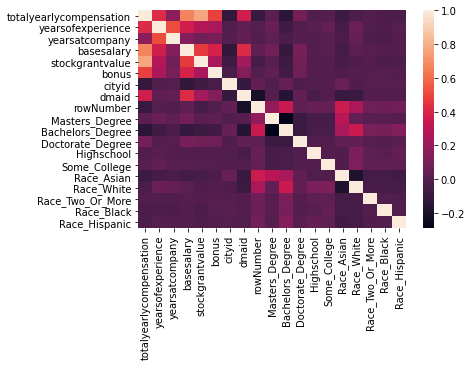

In [7]:
#Started off by making a simple heatmap of correlating features
sns.heatmap(df.corr());

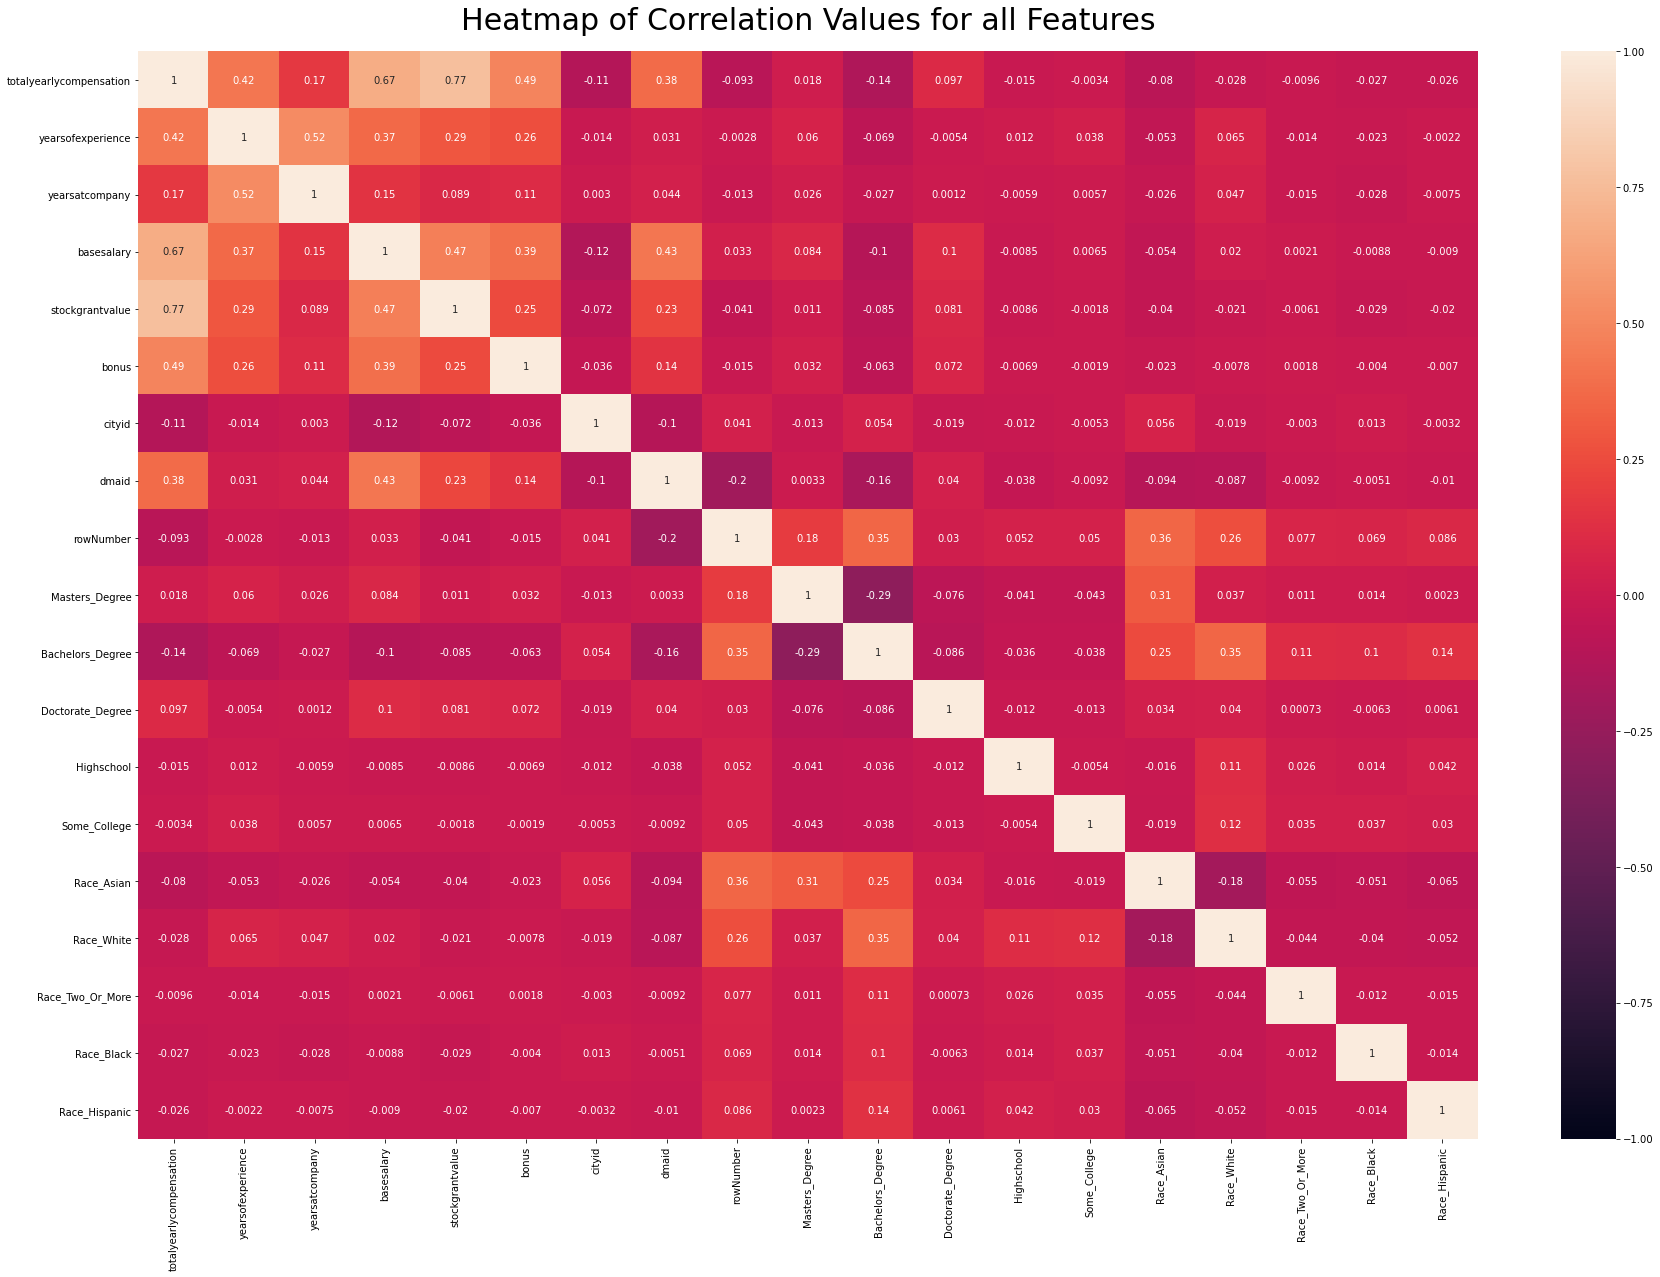

In [8]:
#Improving heatmap
plt.figure(figsize=(30, 20))
#making correlation values from -1 to 1 and annot is true so we can see all correlation values
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap of Correlation Values for all Features', fontdict={'fontsize':30}, pad=22);

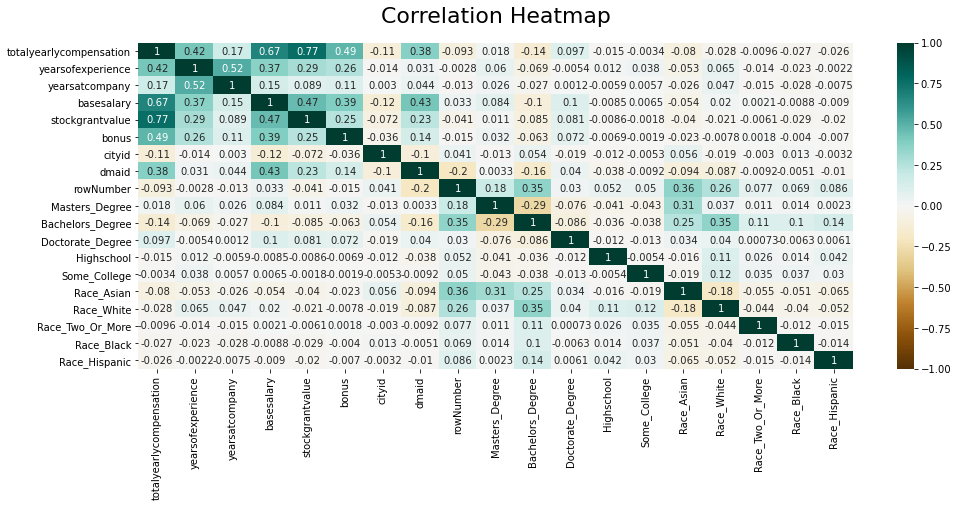

In [9]:
#Easier to read heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':22}, pad=20);
# saving heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

We can see stronger correlations within the darker shaded squares. This is especially helpful for when looking at our feature of interest which is total yearly compensation as it easily tells us which other features are closely related.

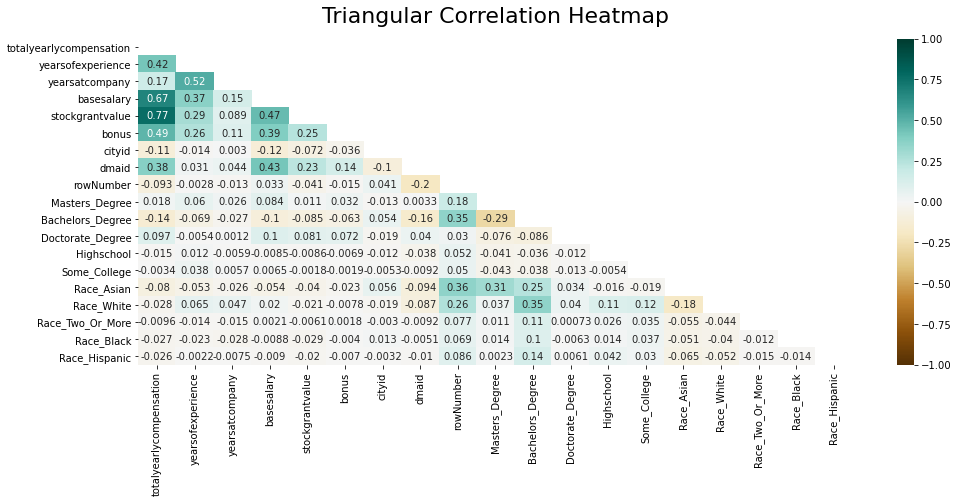

In [10]:
#Making heatmap even easier to read by cutting away the unnecessary half of same info
plt.figure(figsize=(16, 6))
# defining mask to set values in upper triangle to true
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangular Correlation Heatmap', fontdict={'fontsize':22}, pad=16);

Now we have a good sense of what correlates to what but lets take a closer look at the strength of the correlation between every inependent variable we might want to include in our model.

In [11]:
#Gives us the correlation of all features with just total yearly compensation, our dependent variable
df.corr()[['totalyearlycompensation']].sort_values(by='totalyearlycompensation', ascending=False)

totalyearlycompensation
totalyearlycompensation                 1.000000
stockgrantvalue                         0.770756
basesalary                              0.672865
bonus                                   0.489454
yearsofexperience                       0.422879
dmaid                                   0.376346
yearsatcompany                          0.165802
Doctorate_Degree                        0.097179
Masters_Degree                          0.018320
Some_College                           -0.003380
Race_Two_Or_More                       -0.009623
Highschool                             -0.014831
Race_Hispanic                          -0.026145
Race_Black                             -0.026741
Race_White                             -0.027802
Race_Asian                             -0.080072
rowNumber                              -0.092622
cityid                                 -0.110204
Bachelors_Degree                       -0.139866

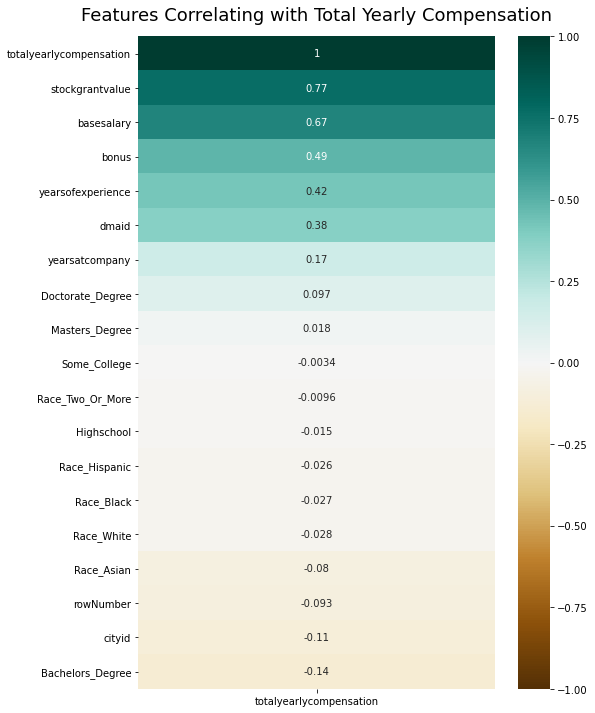

In [12]:
#Isolating heatmap to features from highly correlated to decreasing correlation
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['totalyearlycompensation']].sort_values(by='totalyearlycompensation', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total Yearly Compensation', fontdict={'fontsize':18}, pad=16);

Now we have a nicely laid out heatmap showing us all independent variables and how they correlate in descending order making it easier for us to determine which features we should use for ourt model.

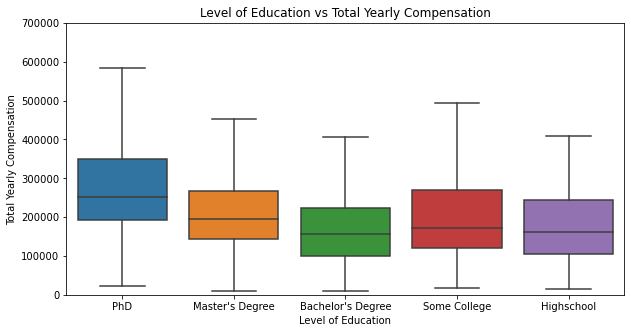

In [13]:
#Using seaborn built in function to make good visual graphs
#Used matplotlib to correct details of graphs
var = 'Education'
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.boxplot(x=var, y="totalyearlycompensation", data=df, showfliers = False)
fig.axis(ymin=0, ymax=700000);

plt.title('Level of Education vs Total Yearly Compensation');
plt.xlabel('Level of Education');
plt.ylabel('Total Yearly Compensation');

>Showing a box whisker plot comparing total yearly compensation and what degree the employee has. We can see a clear trend that people with PhD's seem to be making the most total yearly compensation. It should be noted that the last 3 columns (BA, Some College, and Highschool) are all very similar within their total yearly compensation which does not seem to reflect real life scenarios but could be due to the dataset being within the specific STEM field as most people getting hired would most likely be making similar starting amounts, whether or not they have a formal degree, which could possibly explain why the data is so clustered together for the last 3 columns.

Education
Bachelor's Degree    177845.409095
Highschool           187731.250000
Master's Degree      220731.076603
PhD                  291865.531415
Some College         210121.126761
Name: totalyearlycompensation, dtype: float64
Education
Bachelor's Degree    117969.030391
Highschool           121207.623723
Master's Degree      138376.175034
PhD                  150201.764434
Some College         129397.405989
Name: totalyearlycompensation, dtype: float64


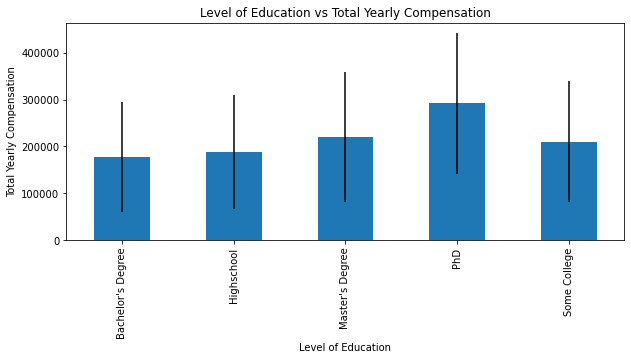

In [14]:
#Printing mean and std as well as graphing using seaborn
cond_mean = df["totalyearlycompensation"].groupby(df["Education"]).aggregate("mean")
cond_std = df["totalyearlycompensation"].groupby(df["Education"]).aggregate("std")
print(cond_mean)
print(cond_std)
cond_mean.plot(kind="bar",figsize=(10,4),yerr = cond_std)

plt.title('Level of Education vs Total Yearly Compensation')
plt.xlabel('Level of Education')
plt.ylabel('Total Yearly Compensation')

plt.show()

> Further analysis with education seems to show similar results as first diagram.

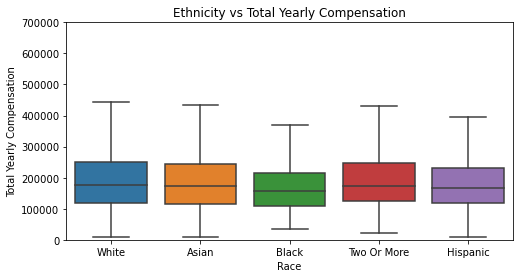

In [15]:
var = 'Race'
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x=var, y="totalyearlycompensation", data=df, showfliers = False)
fig.axis(ymin=0, ymax=700000);

plt.title('Ethnicity vs Total Yearly Compensation');
plt.xlabel('Race');
plt.ylabel('Total Yearly Compensation');

> There does not seem to be much discrepency for when comparing race and total yearly compensation. The African American column seems to have the lowest total yearly compensation. Further exploration needed.

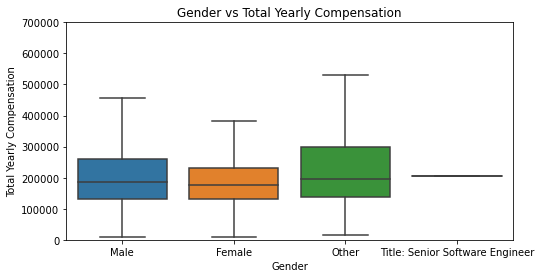

In [16]:
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='gender', y="totalyearlycompensation", data=df, showfliers = False)
fig.axis(ymin=0, ymax=700000);

plt.title('Gender vs Total Yearly Compensation');
plt.xlabel('Gender');
plt.ylabel('Total Yearly Compensation');

Box plot for comparing gender and total yearly compensation. We do see that males get paid more but there are also a lot more males representing the field which could skew the data.

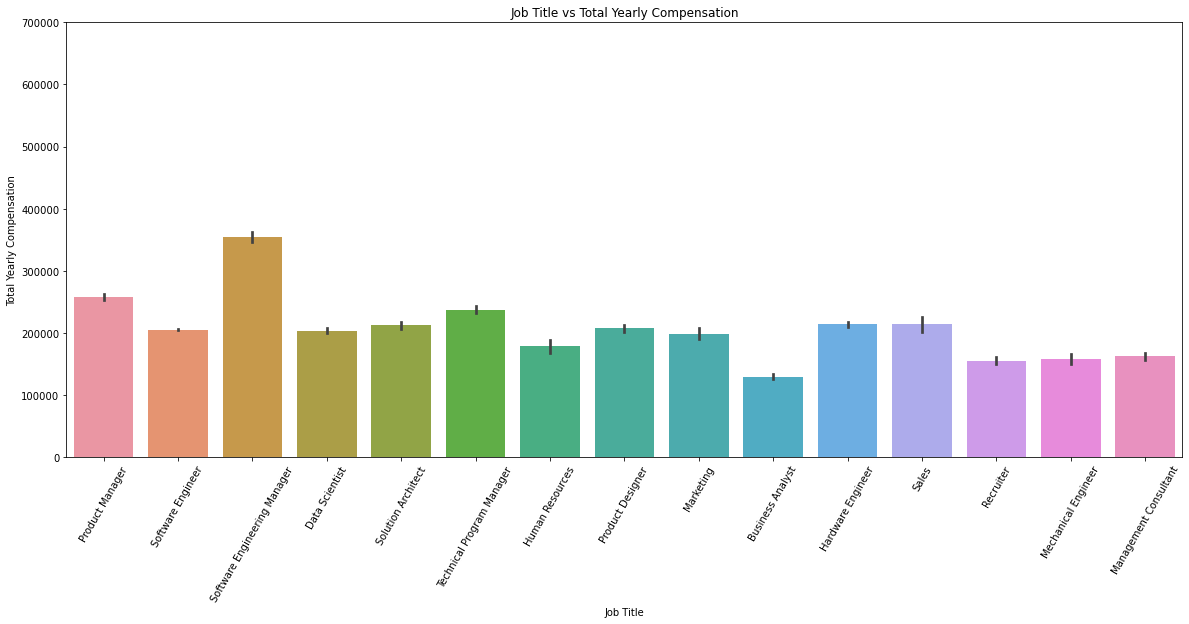

In [17]:
var = 'title'
f, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=60)
fig = sns.barplot(x=var, y="totalyearlycompensation", data=df)
fig.axis(ymin=0, ymax=700000);

plt.title('Job Title vs Total Yearly Compensation');
plt.xlabel('Job Title');
plt.ylabel('Total Yearly Compensation');

>Which job title has the most total yearly compensation? From the graph we can see that software engineering manager on average makes the most total yearly compensation. 

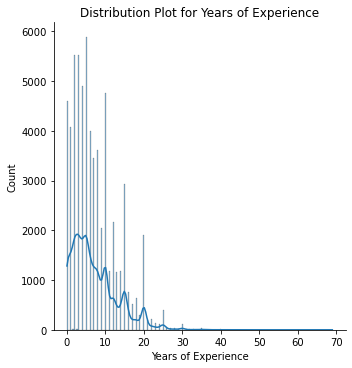

In [18]:
sns.displot(df, x = "yearsofexperience", kde = True)

plt.title('Distribution Plot for Years of Experience')
plt.xlabel('Years of Experience')

plt.show()

> Distribution plot for years of experience. It seems that most poeople withtin the dataset seem to have about 3-6 years of experience.

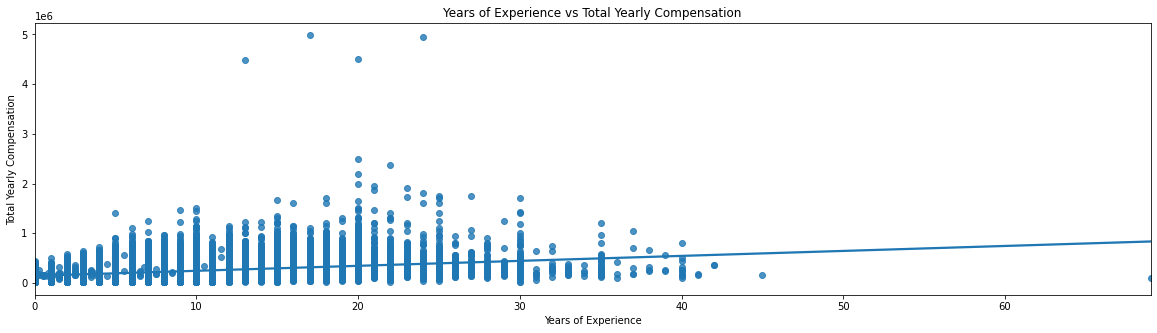

In [19]:
fig = plt.figure(figsize = (20,5))
sns.regplot(x="yearsofexperience", y="totalyearlycompensation", data = df)

plt.title('Years of Experience vs Total Yearly Compensation');
plt.xlabel('Years of Experience');
plt.ylabel('Total Yearly Compensation');

Regression plot comparing total yearly compensation and years of experience.

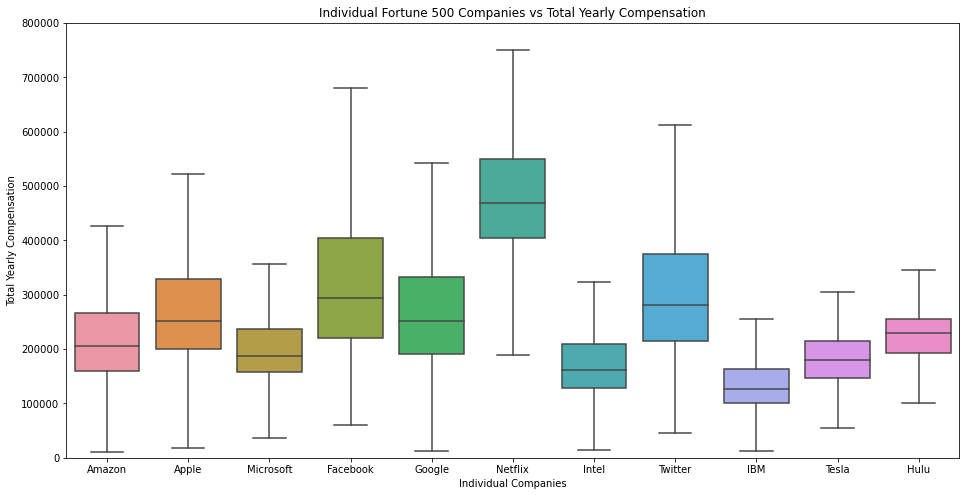

In [20]:
df_company = df[(df['company'] == 'Amazon') | (df['company'] == 'Microsoft') | (df['company'] == 'Google')
       | (df['company'] == 'Facebook') | (df['company'] == 'Apple') | (df['company'] == 'IBM') | (df['company'] == 'Netflix') | (df['company'] == 'Intel') | (df['company'] == 'Tesla') | (df['company'] == 'Twitter') | (df['company'] == 'Hulu')]
var = 'company'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="totalyearlycompensation", data = df_company, showfliers = False)
fig.axis(ymin=0, ymax=800000);

plt.title('Individual Fortune 500 Companies vs Total Yearly Compensation');
plt.xlabel('Individual Companies');
plt.ylabel('Total Yearly Compensation');

Box and whisker plot comparing total yearly compensation between just a few large and well known companies. This diagram provides an idea of about how much on average they pay their employees for companies that most of us are familiar with.

After running through various comparisons and analyzing the data we have a much clearer picture as to what our features might be when creating our model and can use these correlations to our advantage to improve upon our model accuracy and efficiency.